In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from helpers import load_config
import os

In [ ]:
configs = load_config(os.path.join("configs", "configs.yaml"))

# Data exploration and preprocessing

## Reading and exploring data clinical patient file

In [3]:
patientdf = pd.read_csv(
    "Dataset/chol_tcga_pan_can_atlas_2018/data_clinical_patient.txt",
    sep="\t",
    header=4
)
patientdf.head()

,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,GENETIC_ANCESTRY_LABEL
0,TCGA-3X-AAV9,CHOL,CHOL,41B97B11-ACAA-4FBC-B3B0-0ABC1BCAC13B,72,Male,STAGE I,7TH,NaN,-26349,...,Yes,1:DECEASED,11.145083,1:DEAD WITH TUMOR,11.145083,1:Recurred/Progressed,7.101292,1:PROGRESSION,7.101292,EUR_ADMIX
1,TCGA-3X-AAVA,CHOL,CHOL,FE57B639-DB7A-460F-ADFE-552F1E034E46,50,Female,STAGE II,7TH,NaN,-18303,...,Yes,1:DECEASED,14.629977,1:DEAD WITH TUMOR,14.629977,1:Recurred/Progressed,8.679357,1:PROGRESSION,8.679357,EUR
2,TCGA-3X-AAVB,CHOL,CHOL,3824CD6D-C85C-4B21-819A-932D1AFEF976,70,Female,STAGE IVB,7TH,402.0,-25819,...,Yes,0:LIVING,13.216294,0:ALIVE OR DEAD TUMOR FREE,13.216294,NaN,NaN,0:CENSORED,13.216294,EUR
3,TCGA-3X-AAVC,CHOL,CHOL,FF4131C9-537C-46CC-B495-9AF60D431F5E,72,Female,STAGE I,7TH,709.0,-26493,...,Yes,0:LIVING,23.309334,0:ALIVE OR DEAD TUMOR FREE,23.309334,0:DiseaseFree,23.309334,0:CENSORED,23.309334,EUR
4,TCGA-3X-AAVE,CHOL,CHOL,DCC87C59-FD8C-4511-9983-96D5B9784CB0,60,Male,STAGE II,7TH,309.0,-21943,...,Yes,0:LIVING,21.369629,0:ALIVE OR DEAD TUMOR FREE,21.369629,0:DiseaseFree,21.369629,0:CENSORED,21.369629,EAS


In [4]:
subset_clinical = patientdf.head().T

In [5]:
print(patientdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PATIENT_ID                                  36 non-null     object 
 1   SUBTYPE                                     36 non-null     object 
 2   CANCER_TYPE_ACRONYM                         36 non-null     object 
 3   OTHER_PATIENT_ID                            36 non-null     object 
 4   AGE                                         36 non-null     int64  
 5   SEX                                         36 non-null     object 
 6   AJCC_PATHOLOGIC_TUMOR_STAGE                 36 non-null     object 
 7   AJCC_STAGING_EDITION                        36 non-null     object 
 8   DAYS_LAST_FOLLOWUP                          20 non-null     float64
 9   DAYS_TO_BIRTH                               36 non-null     int64  
 10  DAYS_TO_INITIAL_

In [6]:
patientdf.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,36.0,63.027778,12.849649,29.000000,56.500000,66.500000,72.000000,82.000000
DAYS_LAST_FOLLOWUP,20.0,615.950000,521.121006,0.000000,196.500000,534.000000,976.750000,1976.000000
DAYS_TO_BIRTH,36.0,-23185.361111,4692.255547,-30039.000000,-26385.000000,-24592.500000,-20909.750000,-10659.000000
DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,36.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEIGHT,36.0,79.527778,20.391155,49.000000,66.500000,76.500000,89.500000,128.000000
OS_MONTHS,36.0,25.142190,18.307729,0.328764,12.279317,21.205247,39.048887,64.963672
DSS_MONTHS,36.0,25.142190,18.307729,0.328764,12.279317,21.205247,39.048887,64.963672
DFS_MONTHS,24.0,20.558679,19.531495,0.328764,6.928691,15.435447,26.333958,64.963672
PFS_MONTHS,36.0,15.382480,16.579785,0.328764,4.972548,9.073873,18.484729,64.963672


In [7]:
patientdf.isnull().sum()

PATIENT_ID                                     0
SUBTYPE                                        0
CANCER_TYPE_ACRONYM                            0
OTHER_PATIENT_ID                               0
AGE                                            0
SEX                                            0
AJCC_PATHOLOGIC_TUMOR_STAGE                    0
AJCC_STAGING_EDITION                           0
DAYS_LAST_FOLLOWUP                            16
DAYS_TO_BIRTH                                  0
DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS           0
ETHNICITY                                      1
FORM_COMPLETION_DATE                           0
HISTORY_NEOADJUVANT_TRTYN                      0
ICD_10                                         0
ICD_O_3_HISTOLOGY                              0
ICD_O_3_SITE                                   0
INFORMED_CONSENT_VERIFIED                      0
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT        3
PATH_M_STAGE                                   0
PATH_N_STAGE        

In [8]:
# patientdf.corr() #only use with numerical

In [9]:
# # Histogram plots of the training data

# fig,ax =plt.subplots(3,3,figsize=(30,10))
# ax = ax.flatten()

# for i,training_col in enumerate(X.columns):
#     min =  X[training_col].quantile(0.01)
#     max =  X[training_col].quantile(0.99)
#     temp_series = X[training_col][X[training_col] < max].copy()
#     temp_series = temp_series[temp_series > min].copy()
#     sns.histplot(temp_series,ax=ax[i],color=colors[7])
#     ax[i].set_ylabel('Count', fontsize = 15) # Y label
#     ax[i].set_xlabel(training_col, fontsize = 15)

In [10]:
# # Distribution of the target variable
# sns.displot(y,color=colors[7])
# plt.axvline(x=y.mean(), color=colors[7], linestyle='--', linewidth=2,label='Mean House Value')
# plt.xlabel('Median House Value (in Million)')
# plt.legend()
# plt.title('California Housing Prices')

In [11]:
# # Correlation between different training features
# plt.figure(figsize=(30,9))
# sns.heatmap(X.corr(),annot=True)
# # Here we can see that avg Bedrooms and Avg rooms are highly correlation (0.85) which inituiively makes sense, as all bedrooms are rooms. On the other hand even the lattitude and longtitude seem to be highly negatively correlated .This would imply that correlation is not causation.


In [12]:
# # checking for outliers in the data using boxplot
# X.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
# plt.show()

In [13]:
patientdf.columns
['PATIENT_ID', 'SUBTYPE', 'CANCER_TYPE_ACRONYM', 'OTHER_PATIENT_ID',
'AGE', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE', 'AJCC_STAGING_EDITION',
'DAYS_LAST_FOLLOWUP', 'DAYS_TO_BIRTH',
'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', 'ETHNICITY',
'FORM_COMPLETION_DATE', 'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10',
'ICD_O_3_HISTOLOGY', 'ICD_O_3_SITE', 'INFORMED_CONSENT_VERIFIED',
'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 'PATH_M_STAGE',
'PATH_N_STAGE', 'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS',
'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX', 'RACE',
'RADIATION_THERAPY', 'WEIGHT', 'IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS',
'OS_MONTHS', 'DSS_STATUS', 'DSS_MONTHS', 'DFS_STATUS', 'DFS_MONTHS',
'PFS_STATUS', 'PFS_MONTHS', 'GENETIC_ANCESTRY_LABEL']

['PATIENT_ID',
 'SUBTYPE',
 'CANCER_TYPE_ACRONYM',
 'OTHER_PATIENT_ID',
 'AGE',
 'SEX',
 'AJCC_PATHOLOGIC_TUMOR_STAGE',
 'AJCC_STAGING_EDITION',
 'DAYS_LAST_FOLLOWUP',
 'DAYS_TO_BIRTH',
 'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS',
 'ETHNICITY',
 'FORM_COMPLETION_DATE',
 'HISTORY_NEOADJUVANT_TRTYN',
 'ICD_10',
 'ICD_O_3_HISTOLOGY',
 'ICD_O_3_SITE',
 'INFORMED_CONSENT_VERIFIED',
 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
 'PATH_M_STAGE',
 'PATH_N_STAGE',
 'PATH_T_STAGE',
 'PERSON_NEOPLASM_CANCER_STATUS',
 'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT',
 'PRIOR_DX',
 'RACE',
 'RADIATION_THERAPY',
 'WEIGHT',
 'IN_PANCANPATHWAYS_FREEZE',
 'OS_STATUS',
 'OS_MONTHS',
 'DSS_STATUS',
 'DSS_MONTHS',
 'DFS_STATUS',
 'DFS_MONTHS',
 'PFS_STATUS',
 'PFS_MONTHS',
 'GENETIC_ANCESTRY_LABEL']

In [14]:
Columns_being_discarded =  [
    'SUBTYPE', 
    'CANCER_TYPE_ACRONYM', 
    'OTHER_PATIENT_ID', 
    'AJCC_STAGING_EDITION'
    'DAYS_LAST_FOLLOWUP',
    'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS',
    'ETHNICITY',
    'FORM_COMPLETION_DATE',
    'HISTORY_NEOADJUVANT_TRTYN', # consider adding if there is more variety in values after combining the dataset
    'ICD_O_3_HISTOLOGY' , 
    'ICD_O_3_SITE',
    'INFORMED_CONSENT_VERIFIED',
    'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT',
    'RADIATION_THERAPY' # consider adding if there is more variety in values after combining the dataset
    'IN_PANCANPATHWAYS_FREEZE',
    'OS_STATUS',
    'OS_MONTHS',
    'DSS_STATUS',
    'DSS_MONTHS',
    'DFS_STATUS',
    'DFS_MONTHS',
    

    ]

In [15]:
patientdf_1 =  patientdf[
            [
                'PATIENT_ID', 
                'AGE', 
                'SEX', 
                'AJCC_PATHOLOGIC_TUMOR_STAGE',
                'DAYS_TO_BIRTH', # derive age when they got cancer
                'ICD_10', # describes type of cancer
                'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
                'PATH_M_STAGE',
                'PATH_N_STAGE', 
                'PATH_T_STAGE',
                'PERSON_NEOPLASM_CANCER_STATUS',
                'PRIOR_DX',
                'RACE',
                'WEIGHT',
                'PFS_STATUS',
                'PFS_MONTHS'   
            ]
        ]

In [16]:
patientdf_1.shape

(36, 16)

## Reading and exploring data clinical sample 

In [17]:
sampledf = pd.read_csv(
    "Dataset/chol_tcga_pan_can_atlas_2018/data_clinical_sample.txt",
    sep="\t",
    header=4
)
sampledf.head()

,PATIENT_ID,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,ANEUPLOIDY_SCORE,SAMPLE_TYPE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,TISSUE_SOURCE_SITE
0,TCGA-3X-AAV9,TCGA-3X-AAV9-01,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,Yes,No,3X,Bile Duct,10,Primary,0.3138,0.00,Matched,1.433333,Alberta Health Services
1,TCGA-3X-AAVA,TCGA-3X-AAVA-01,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,Yes,No,3X,Bile Duct,5,Primary,0.3468,0.02,Matched,1.000000,Alberta Health Services
2,TCGA-3X-AAVB,TCGA-3X-AAVB-01,CHOL,Cholangiocarcinoma,Cholangiocarcinoma,"Cholangiocarcinoma, Distal",G1,No,Yes,3X,Bile Duct,24,Primary,0.3343,0.00,Matched,1.000000,Alberta Health Services
3,TCGA-3X-AAVC,TCGA-3X-AAVC-01,PHCH,Cholangiocarcinoma,Perihilar Cholangiocarcinoma,"Cholangiocarcinoma, Hilar/Perihilar",G3,No,Yes,3X,Bile Duct,24,Primary,0.3552,0.50,Matched,1.733333,Alberta Health Services
4,TCGA-3X-AAVE,TCGA-3X-AAVE-01,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,Yes,No,3X,Bile Duct,9,Primary,0.3195,0.00,Matched,1.333333,Alberta Health Services


In [18]:
print(sampledf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PATIENT_ID                                 36 non-null     object 
 1   SAMPLE_ID                                  36 non-null     object 
 2   ONCOTREE_CODE                              36 non-null     object 
 3   CANCER_TYPE                                36 non-null     object 
 4   CANCER_TYPE_DETAILED                       36 non-null     object 
 5   TUMOR_TYPE                                 36 non-null     object 
 6   GRADE                                      36 non-null     object 
 7   TISSUE_PROSPECTIVE_COLLECTION_INDICATOR    36 non-null     object 
 8   TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR  36 non-null     object 
 9   TISSUE_SOURCE_SITE_CODE                    36 non-null     object 
 10  TUMOR_TISSUE_SITE           

In [21]:
subset_sample = sampledf.head().T

# pd.concat((subset_clinical, subset_sample))#.to_excel(configs["STORAGE_DIR_STUDY1"]+"clinical_sample_attrs.xlsx")

In [22]:
sampledf.describe()

,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,TMB_NONSYNONYMOUS
count,36.000000,36.000000,36.000000,36.000000
mean,10.416667,0.333672,0.161944,2.321296
std,7.590878,0.012061,0.239378,3.488076
min,0.000000,0.312200,0.000000,0.200000
25%,5.750000,0.322950,0.007500,1.050000
50%,9.000000,0.333100,0.080000,1.450000
75%,12.250000,0.343825,0.220000,2.325000
max,29.000000,0.355200,1.190000,21.833333


In [23]:
sampledf.columns

Index(['PATIENT_ID', 'SAMPLE_ID', 'ONCOTREE_CODE', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED', 'TUMOR_TYPE', 'GRADE',
       'TISSUE_PROSPECTIVE_COLLECTION_INDICATOR',
       'TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR', 'TISSUE_SOURCE_SITE_CODE',
       'TUMOR_TISSUE_SITE', 'ANEUPLOIDY_SCORE', 'SAMPLE_TYPE',
       'MSI_SCORE_MANTIS', 'MSI_SENSOR_SCORE', 'SOMATIC_STATUS',
       'TMB_NONSYNONYMOUS', 'TISSUE_SOURCE_SITE'],
      dtype='object')

In [24]:
Columns_being_discarded_sampledf = [
    'TISSUE_PROSPECTIVE_COLLECTION_INDICATOR',
    'TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR', 
    'TISSUE_SOURCE_SITE_CODE',
    'TUMOR_TISSUE_SITE',
    'SAMPLE_TYPE', # has only one value "Primary"
    'TISSUE_SOURCE_SITE'
]

In [25]:
columns_to_keep_sampledf = [
    'PATIENT_ID', 
    'SAMPLE_ID', 
    'ONCOTREE_CODE', # redundant since ICD_10 captures the same info
    'CANCER_TYPE',
    'CANCER_TYPE_DETAILED', # redundant since ICD_10 captures the same info
    'TUMOR_TYPE', 
    'GRADE', # might be the same as patient.PATH_T_STAGE
    'ANEUPLOIDY_SCORE', 
    'MSI_SCORE_MANTIS', # genetic instability
    'MSI_SENSOR_SCORE', 
    'SOMATIC_STATUS',
    'TMB_NONSYNONYMOUS', 
]

In [26]:
sampledf_1 = sampledf[columns_to_keep_sampledf]
sampledf_1.head()

,PATIENT_ID,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,TCGA-3X-AAV9,TCGA-3X-AAV9-01,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,10,0.3138,0.00,Matched,1.433333
1,TCGA-3X-AAVA,TCGA-3X-AAVA-01,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,5,0.3468,0.02,Matched,1.000000
2,TCGA-3X-AAVB,TCGA-3X-AAVB-01,CHOL,Cholangiocarcinoma,Cholangiocarcinoma,"Cholangiocarcinoma, Distal",G1,24,0.3343,0.00,Matched,1.000000
3,TCGA-3X-AAVC,TCGA-3X-AAVC-01,PHCH,Cholangiocarcinoma,Perihilar Cholangiocarcinoma,"Cholangiocarcinoma, Hilar/Perihilar",G3,24,0.3552,0.50,Matched,1.733333
4,TCGA-3X-AAVE,TCGA-3X-AAVE-01,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,9,0.3195,0.00,Matched,1.333333


In [27]:
max_samples = sampledf_1.groupby('PATIENT_ID')['SAMPLE_ID'].nunique().max()
print("Maximum number of sample_ids for a given patient_id:", max_samples)

Maximum number of sample_ids for a given patient_id: 1


## Joining patient and sample data 

In [28]:
df = pd.merge(patientdf_1, sampledf_1, on='PATIENT_ID', how='inner')
df.head()

,PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,DAYS_TO_BIRTH,ICD_10,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,...,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,TCGA-3X-AAV9,72,Male,STAGE I,-26349,C22.1,Yes,M0,N0,T1,...,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,10,0.3138,0.00,Matched,1.433333
1,TCGA-3X-AAVA,50,Female,STAGE II,-18303,C22.1,Yes,M0,NX,T2B,...,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,5,0.3468,0.02,Matched,1.000000
2,TCGA-3X-AAVB,70,Female,STAGE IVB,-25819,C24.0,NaN,M1,N1,T3,...,CHOL,Cholangiocarcinoma,Cholangiocarcinoma,"Cholangiocarcinoma, Distal",G1,24,0.3343,0.00,Matched,1.000000
3,TCGA-3X-AAVC,72,Female,STAGE I,-26493,C24.0,No,M0,N0,T1,...,PHCH,Cholangiocarcinoma,Perihilar Cholangiocarcinoma,"Cholangiocarcinoma, Hilar/Perihilar",G3,24,0.3552,0.50,Matched,1.733333
4,TCGA-3X-AAVE,60,Male,STAGE II,-21943,C22.1,No,M0,N0,T2,...,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,9,0.3195,0.00,Matched,1.333333


Mapping Tumor stage to int values

In [29]:
df.AJCC_PATHOLOGIC_TUMOR_STAGE.unique()

array(['STAGE I', 'STAGE II', 'STAGE IVB', 'STAGE III', 'STAGE IVA',
       'STAGE IV'], dtype=object)

In [30]:
stage_mapping = {
    'STAGE I': 1,
    'STAGE II': 2,
    'STAGE III': 3,
    'STAGE IV': 4,
    'STAGE IVA': 4,
    'STAGE IVB': 4.5
}

df['CANCER_STAGE'] = df['AJCC_PATHOLOGIC_TUMOR_STAGE'].map(stage_mapping)
df = df.drop('AJCC_PATHOLOGIC_TUMOR_STAGE', axis=1)
df.head()

,PATIENT_ID,AGE,SEX,DAYS_TO_BIRTH,ICD_10,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,...,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_STAGE
0,TCGA-3X-AAV9,72,Male,-26349,C22.1,Yes,M0,N0,T1,With Tumor,...,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,10,0.3138,0.00,Matched,1.433333,1.0
1,TCGA-3X-AAVA,50,Female,-18303,C22.1,Yes,M0,NX,T2B,With Tumor,...,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,5,0.3468,0.02,Matched,1.000000,2.0
2,TCGA-3X-AAVB,70,Female,-25819,C24.0,NaN,M1,N1,T3,NaN,...,Cholangiocarcinoma,Cholangiocarcinoma,"Cholangiocarcinoma, Distal",G1,24,0.3343,0.00,Matched,1.000000,4.5
3,TCGA-3X-AAVC,72,Female,-26493,C24.0,No,M0,N0,T1,Tumor Free,...,Cholangiocarcinoma,Perihilar Cholangiocarcinoma,"Cholangiocarcinoma, Hilar/Perihilar",G3,24,0.3552,0.50,Matched,1.733333,1.0
4,TCGA-3X-AAVE,60,Male,-21943,C22.1,No,M0,N0,T2,Tumor Free,...,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,9,0.3195,0.00,Matched,1.333333,2.0


In [31]:
df["AGE_AT_INITIAL_DIAGNOSIS"] = df['DAYS_TO_BIRTH']/-365.25
df = df.drop(['DAYS_TO_BIRTH', 'AGE'], axis=1)
df.head()

,PATIENT_ID,SEX,ICD_10,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIOR_DX,RACE,...,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_STAGE,AGE_AT_INITIAL_DIAGNOSIS
0,TCGA-3X-AAV9,Male,C22.1,Yes,M0,N0,T1,With Tumor,Yes,Asian,...,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,10,0.3138,0.00,Matched,1.433333,1.0,72.139630
1,TCGA-3X-AAVA,Female,C22.1,Yes,M0,NX,T2B,With Tumor,No,White,...,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,5,0.3468,0.02,Matched,1.000000,2.0,50.110883
2,TCGA-3X-AAVB,Female,C24.0,NaN,M1,N1,T3,NaN,No,White,...,Cholangiocarcinoma,"Cholangiocarcinoma, Distal",G1,24,0.3343,0.00,Matched,1.000000,4.5,70.688569
3,TCGA-3X-AAVC,Female,C24.0,No,M0,N0,T1,Tumor Free,No,White,...,Perihilar Cholangiocarcinoma,"Cholangiocarcinoma, Hilar/Perihilar",G3,24,0.3552,0.50,Matched,1.733333,1.0,72.533881
4,TCGA-3X-AAVE,Male,C22.1,No,M0,N0,T2,Tumor Free,No,Asian,...,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,9,0.3195,0.00,Matched,1.333333,2.0,60.076660


In [32]:
df[['ICD_10', 'CANCER_TYPE_DETAILED', 'TUMOR_TYPE']].drop_duplicates()

,ICD_10,CANCER_TYPE_DETAILED,TUMOR_TYPE
0,C22.1,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic"
2,C24.0,Cholangiocarcinoma,"Cholangiocarcinoma, Distal"
3,C24.0,Perihilar Cholangiocarcinoma,"Cholangiocarcinoma, Hilar/Perihilar"
8,C22.1,Cholangiocarcinoma,"Cholangiocarcinoma, Distal"
22,C22.1,Perihilar Cholangiocarcinoma,"Cholangiocarcinoma, Hilar/Perihilar"
26,C22.0,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic"


Looks like values in the three columns donot match uniquely. Taking only IDC_10

In [35]:
df = df.drop(['CANCER_TYPE_DETAILED', 'TUMOR_TYPE'], axis=1)
df.head()

,PATIENT_ID,SEX,ICD_10,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIOR_DX,RACE,...,ONCOTREE_CODE,CANCER_TYPE,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_STAGE,AGE_AT_INITIAL_DIAGNOSIS
0,TCGA-3X-AAV9,Male,C22.1,Yes,M0,N0,T1,With Tumor,Yes,Asian,...,IHCH,Cholangiocarcinoma,G2,10,0.3138,0.00,Matched,1.433333,1.0,72.139630
1,TCGA-3X-AAVA,Female,C22.1,Yes,M0,NX,T2B,With Tumor,No,White,...,IHCH,Cholangiocarcinoma,G2,5,0.3468,0.02,Matched,1.000000,2.0,50.110883
2,TCGA-3X-AAVB,Female,C24.0,NaN,M1,N1,T3,NaN,No,White,...,CHOL,Cholangiocarcinoma,G1,24,0.3343,0.00,Matched,1.000000,4.5,70.688569
3,TCGA-3X-AAVC,Female,C24.0,No,M0,N0,T1,Tumor Free,No,White,...,PHCH,Cholangiocarcinoma,G3,24,0.3552,0.50,Matched,1.733333,1.0,72.533881
4,TCGA-3X-AAVE,Male,C22.1,No,M0,N0,T2,Tumor Free,No,Asian,...,IHCH,Cholangiocarcinoma,G2,9,0.3195,0.00,Matched,1.333333,2.0,60.076660


In [36]:
df["M_STAGE"] = df["PATH_M_STAGE"].str[1]
df = df.drop(['PATH_M_STAGE'], axis=1)
df.head()

,PATIENT_ID,SEX,ICD_10,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIOR_DX,RACE,WEIGHT,...,CANCER_TYPE,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_STAGE,AGE_AT_INITIAL_DIAGNOSIS,M_STAGE
0,TCGA-3X-AAV9,Male,C22.1,Yes,N0,T1,With Tumor,Yes,Asian,52,...,Cholangiocarcinoma,G2,10,0.3138,0.00,Matched,1.433333,1.0,72.139630,0
1,TCGA-3X-AAVA,Female,C22.1,Yes,NX,T2B,With Tumor,No,White,92,...,Cholangiocarcinoma,G2,5,0.3468,0.02,Matched,1.000000,2.0,50.110883,0
2,TCGA-3X-AAVB,Female,C24.0,NaN,N1,T3,NaN,No,White,76,...,Cholangiocarcinoma,G1,24,0.3343,0.00,Matched,1.000000,4.5,70.688569,1
3,TCGA-3X-AAVC,Female,C24.0,No,N0,T1,Tumor Free,No,White,104,...,Cholangiocarcinoma,G3,24,0.3552,0.50,Matched,1.733333,1.0,72.533881,0
4,TCGA-3X-AAVE,Male,C22.1,No,N0,T2,Tumor Free,No,Asian,59,...,Cholangiocarcinoma,G2,9,0.3195,0.00,Matched,1.333333,2.0,60.076660,0


In [37]:
df["N_STAGE"] = df["PATH_N_STAGE"].str[1]
df.drop(['PATH_N_STAGE'], axis=1, inplace=True)
df.head()

,PATIENT_ID,SEX,ICD_10,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIOR_DX,RACE,WEIGHT,PFS_STATUS,...,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_STAGE,AGE_AT_INITIAL_DIAGNOSIS,M_STAGE,N_STAGE
0,TCGA-3X-AAV9,Male,C22.1,Yes,T1,With Tumor,Yes,Asian,52,1:PROGRESSION,...,G2,10,0.3138,0.00,Matched,1.433333,1.0,72.139630,0,0
1,TCGA-3X-AAVA,Female,C22.1,Yes,T2B,With Tumor,No,White,92,1:PROGRESSION,...,G2,5,0.3468,0.02,Matched,1.000000,2.0,50.110883,0,X
2,TCGA-3X-AAVB,Female,C24.0,NaN,T3,NaN,No,White,76,0:CENSORED,...,G1,24,0.3343,0.00,Matched,1.000000,4.5,70.688569,1,1
3,TCGA-3X-AAVC,Female,C24.0,No,T1,Tumor Free,No,White,104,0:CENSORED,...,G3,24,0.3552,0.50,Matched,1.733333,1.0,72.533881,0,0
4,TCGA-3X-AAVE,Male,C22.1,No,T2,Tumor Free,No,Asian,59,0:CENSORED,...,G2,9,0.3195,0.00,Matched,1.333333,2.0,60.076660,0,0


In [38]:
df["T_STAGE"] = df["PATH_T_STAGE"].str[1]
df.drop(['PATH_T_STAGE'], axis=1, inplace=True)
df.head()

,PATIENT_ID,SEX,ICD_10,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PERSON_NEOPLASM_CANCER_STATUS,PRIOR_DX,RACE,WEIGHT,PFS_STATUS,PFS_MONTHS,...,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_STAGE,AGE_AT_INITIAL_DIAGNOSIS,M_STAGE,N_STAGE,T_STAGE
0,TCGA-3X-AAV9,Male,C22.1,Yes,With Tumor,Yes,Asian,52,1:PROGRESSION,7.101292,...,10,0.3138,0.00,Matched,1.433333,1.0,72.139630,0,0,1
1,TCGA-3X-AAVA,Female,C22.1,Yes,With Tumor,No,White,92,1:PROGRESSION,8.679357,...,5,0.3468,0.02,Matched,1.000000,2.0,50.110883,0,X,2
2,TCGA-3X-AAVB,Female,C24.0,NaN,NaN,No,White,76,0:CENSORED,13.216294,...,24,0.3343,0.00,Matched,1.000000,4.5,70.688569,1,1,3
3,TCGA-3X-AAVC,Female,C24.0,No,Tumor Free,No,White,104,0:CENSORED,23.309334,...,24,0.3552,0.50,Matched,1.733333,1.0,72.533881,0,0,1
4,TCGA-3X-AAVE,Male,C22.1,No,Tumor Free,No,Asian,59,0:CENSORED,21.369629,...,9,0.3195,0.00,Matched,1.333333,2.0,60.076660,0,0,2


In [39]:
df.head().T

,0,1,2,3,4
PATIENT_ID,TCGA-3X-AAV9,TCGA-3X-AAVA,TCGA-3X-AAVB,TCGA-3X-AAVC,TCGA-3X-AAVE
SEX,Male,Female,Female,Female,Male
ICD_10,C22.1,C22.1,C24.0,C24.0,C22.1
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,Yes,Yes,NaN,No,No
PERSON_NEOPLASM_CANCER_STATUS,With Tumor,With Tumor,NaN,Tumor Free,Tumor Free
PRIOR_DX,Yes,No,No,No,No
RACE,Asian,White,White,White,Asian
WEIGHT,52,92,76,104,59
PFS_STATUS,1:PROGRESSION,1:PROGRESSION,0:CENSORED,0:CENSORED,0:CENSORED
PFS_MONTHS,7.101292,8.679357,13.216294,23.309334,21.369629


In [40]:
df["ONCOTREE_CODE"].unique()

array(['IHCH', 'CHOL', 'PHCH'], dtype=object)

ONCOTREE_CODE column has the same information as ICD_10, So dropping ICD_10

In [41]:
df.drop(['ICD_10'], axis=1, inplace=True)
df.head().T

,0,1,2,3,4
PATIENT_ID,TCGA-3X-AAV9,TCGA-3X-AAVA,TCGA-3X-AAVB,TCGA-3X-AAVC,TCGA-3X-AAVE
SEX,Male,Female,Female,Female,Male
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,Yes,Yes,NaN,No,No
PERSON_NEOPLASM_CANCER_STATUS,With Tumor,With Tumor,NaN,Tumor Free,Tumor Free
PRIOR_DX,Yes,No,No,No,No
RACE,Asian,White,White,White,Asian
WEIGHT,52,92,76,104,59
PFS_STATUS,1:PROGRESSION,1:PROGRESSION,0:CENSORED,0:CENSORED,0:CENSORED
PFS_MONTHS,7.101292,8.679357,13.216294,23.309334,21.369629
SAMPLE_ID,TCGA-3X-AAV9-01,TCGA-3X-AAVA-01,TCGA-3X-AAVB-01,TCGA-3X-AAVC-01,TCGA-3X-AAVE-01


In [42]:
df["GRADE"] = df["GRADE"].str[1]

In [43]:
df.head().T

,0,1,2,3,4
PATIENT_ID,TCGA-3X-AAV9,TCGA-3X-AAVA,TCGA-3X-AAVB,TCGA-3X-AAVC,TCGA-3X-AAVE
SEX,Male,Female,Female,Female,Male
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,Yes,Yes,NaN,No,No
PERSON_NEOPLASM_CANCER_STATUS,With Tumor,With Tumor,NaN,Tumor Free,Tumor Free
PRIOR_DX,Yes,No,No,No,No
RACE,Asian,White,White,White,Asian
WEIGHT,52,92,76,104,59
PFS_STATUS,1:PROGRESSION,1:PROGRESSION,0:CENSORED,0:CENSORED,0:CENSORED
PFS_MONTHS,7.101292,8.679357,13.216294,23.309334,21.369629
SAMPLE_ID,TCGA-3X-AAV9-01,TCGA-3X-AAVA-01,TCGA-3X-AAVB-01,TCGA-3X-AAVC-01,TCGA-3X-AAVE-01


In [44]:
df.drop(["SOMATIC_STATUS"], axis=1, inplace=True)

In [46]:
df = pd.get_dummies(df, columns=['SEX'], drop_first=True)

In [47]:
df.head().T

,0,1,2,3,4
PATIENT_ID,TCGA-3X-AAV9,TCGA-3X-AAVA,TCGA-3X-AAVB,TCGA-3X-AAVC,TCGA-3X-AAVE
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,Yes,Yes,NaN,No,No
PERSON_NEOPLASM_CANCER_STATUS,With Tumor,With Tumor,NaN,Tumor Free,Tumor Free
PRIOR_DX,Yes,No,No,No,No
RACE,Asian,White,White,White,Asian
WEIGHT,52,92,76,104,59
PFS_STATUS,1:PROGRESSION,1:PROGRESSION,0:CENSORED,0:CENSORED,0:CENSORED
PFS_MONTHS,7.101292,8.679357,13.216294,23.309334,21.369629
SAMPLE_ID,TCGA-3X-AAV9-01,TCGA-3X-AAVA-01,TCGA-3X-AAVB-01,TCGA-3X-AAVC-01,TCGA-3X-AAVE-01
ONCOTREE_CODE,IHCH,IHCH,CHOL,PHCH,IHCH


In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PATIENT_ID                               36 non-null     object 
 1   NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT  33 non-null     object 
 2   PERSON_NEOPLASM_CANCER_STATUS            34 non-null     object 
 3   PRIOR_DX                                 36 non-null     object 
 4   RACE                                     36 non-null     object 
 5   WEIGHT                                   36 non-null     int64  
 6   PFS_STATUS                               36 non-null     object 
 7   PFS_MONTHS                               36 non-null     float64
 8   SAMPLE_ID                                36 non-null     object 
 9   ONCOTREE_CODE                            36 non-null     object 
 10  CANCER_TYPE                              36 non-null

NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT has one null and all other values are Yes. So dropping it

In [49]:
df.drop("NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT", axis=1, inplace=True)
df

,PATIENT_ID,PERSON_NEOPLASM_CANCER_STATUS,PRIOR_DX,RACE,WEIGHT,PFS_STATUS,PFS_MONTHS,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,...,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,TMB_NONSYNONYMOUS,CANCER_STAGE,AGE_AT_INITIAL_DIAGNOSIS,M_STAGE,N_STAGE,T_STAGE,SEX_Male
0,TCGA-3X-AAV9,With Tumor,Yes,Asian,52,1:PROGRESSION,7.101292,TCGA-3X-AAV9-01,IHCH,Cholangiocarcinoma,...,10,0.3138,0.00,1.433333,1.0,72.139630,0,0,1,True
1,TCGA-3X-AAVA,With Tumor,No,White,92,1:PROGRESSION,8.679357,TCGA-3X-AAVA-01,IHCH,Cholangiocarcinoma,...,5,0.3468,0.02,1.000000,2.0,50.110883,0,X,2,False
2,TCGA-3X-AAVB,NaN,No,White,76,0:CENSORED,13.216294,TCGA-3X-AAVB-01,CHOL,Cholangiocarcinoma,...,24,0.3343,0.00,1.000000,4.5,70.688569,1,1,3,False
3,TCGA-3X-AAVC,Tumor Free,No,White,104,0:CENSORED,23.309334,TCGA-3X-AAVC-01,PHCH,Cholangiocarcinoma,...,24,0.3552,0.50,1.733333,1.0,72.533881,0,0,1,False
4,TCGA-3X-AAVE,Tumor Free,No,Asian,59,0:CENSORED,21.369629,TCGA-3X-AAVE-01,IHCH,Cholangiocarcinoma,...,9,0.3195,0.00,1.333333,2.0,60.076660,0,0,2,True
5,TCGA-4G-AAZO,With Tumor,No,White,67,1:PROGRESSION,13.939573,TCGA-4G-AAZO-01,IHCH,Cholangiocarcinoma,...,9,0.3473,0.07,1.333333,2.0,71.154004,0,0,2,False
6,TCGA-4G-AAZT,Tumor Free,No,White,65,0:CENSORED,13.808068,TCGA-4G-AAZT-01,IHCH,Cholangiocarcinoma,...,5,0.3328,0.16,2.833333,1.0,62.360027,0,0,1,True
7,TCGA-W5-AA2G,Tumor Free,No,White,52,0:CENSORED,64.963672,TCGA-W5-AA2G-01,IHCH,Cholangiocarcinoma,...,10,0.3506,0.00,1.200000,1.0,62.787132,0,0,1,False
8,TCGA-W5-AA2H,Tumor Free,No,White,71,0:CENSORED,35.407831,TCGA-W5-AA2H-01,CHOL,Cholangiocarcinoma,...,0,0.3243,0.01,0.200000,3.0,70.568104,0,0,3,False
9,TCGA-W5-AA2I,With Tumor,No,White,125,1:PROGRESSION,7.134168,TCGA-W5-AA2I-01,IHCH,Cholangiocarcinoma,...,6,0.3394,0.14,3.166667,1.0,66.770705,0,0,1,True


In [50]:
df = pd.get_dummies(df, columns=['PERSON_NEOPLASM_CANCER_STATUS', "PRIOR_DX", "RACE", "ONCOTREE_CODE"], drop_first=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   PATIENT_ID                                36 non-null     object 
 1   WEIGHT                                    36 non-null     int64  
 2   PFS_STATUS                                36 non-null     object 
 3   PFS_MONTHS                                36 non-null     float64
 4   SAMPLE_ID                                 36 non-null     object 
 5   CANCER_TYPE                               36 non-null     object 
 6   GRADE                                     36 non-null     object 
 7   ANEUPLOIDY_SCORE                          36 non-null     int64  
 8   MSI_SCORE_MANTIS                          36 non-null     float64
 9   MSI_SENSOR_SCORE                          36 non-null     float64
 10  TMB_NONSYNONYMOUS                       

In [52]:
# GRADE, M_STAGE, N_STAGE, T_STAGE, 
df['GRADE'] = pd.to_numeric(df['GRADE'])

In [53]:
df['T_STAGE'] = pd.to_numeric(df['T_STAGE'])

In [54]:
df["N_STAGE"] = pd.to_numeric(df["N_STAGE"].replace({"X": "0.5"}))
df["M_STAGE"] = pd.to_numeric(df["M_STAGE"].replace({"X": "0.5"}))

In [55]:
bool_cols = ["SEX_Male", "PERSON_NEOPLASM_CANCER_STATUS_With Tumor", "PRIOR_DX_Yes", "RACE_Black or African American", "RACE_White", "ONCOTREE_CODE_PHCH"]

for col in bool_cols:
    df[col] = df[col].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   PATIENT_ID                                36 non-null     object 
 1   WEIGHT                                    36 non-null     int64  
 2   PFS_STATUS                                36 non-null     object 
 3   PFS_MONTHS                                36 non-null     float64
 4   SAMPLE_ID                                 36 non-null     object 
 5   CANCER_TYPE                               36 non-null     object 
 6   GRADE                                     36 non-null     int64  
 7   ANEUPLOIDY_SCORE                          36 non-null     int64  
 8   MSI_SCORE_MANTIS                          36 non-null     float64
 9   MSI_SENSOR_SCORE                          36 non-null     float64
 10  TMB_NONSYNONYMOUS                       

In [59]:
print(df.shape)
df.head()

(36, 23)


,PATIENT_ID,WEIGHT,PFS_STATUS,PFS_MONTHS,SAMPLE_ID,CANCER_TYPE,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,...,M_STAGE,N_STAGE,T_STAGE,SEX_Male,PERSON_NEOPLASM_CANCER_STATUS_With Tumor,PRIOR_DX_Yes,RACE_Black or African American,RACE_White,ONCOTREE_CODE_IHCH,ONCOTREE_CODE_PHCH
0,TCGA-3X-AAV9,52,1:PROGRESSION,7.101292,TCGA-3X-AAV9-01,Cholangiocarcinoma,2,10,0.3138,0.00,...,0.0,0.0,1,1,1,1,0,0,True,0
1,TCGA-3X-AAVA,92,1:PROGRESSION,8.679357,TCGA-3X-AAVA-01,Cholangiocarcinoma,2,5,0.3468,0.02,...,0.0,0.5,2,0,1,0,0,1,True,0
2,TCGA-3X-AAVB,76,0:CENSORED,13.216294,TCGA-3X-AAVB-01,Cholangiocarcinoma,1,24,0.3343,0.00,...,1.0,1.0,3,0,0,0,0,1,False,0
3,TCGA-3X-AAVC,104,0:CENSORED,23.309334,TCGA-3X-AAVC-01,Cholangiocarcinoma,3,24,0.3552,0.50,...,0.0,0.0,1,0,0,0,0,1,False,1
4,TCGA-3X-AAVE,59,0:CENSORED,21.369629,TCGA-3X-AAVE-01,Cholangiocarcinoma,2,9,0.3195,0.00,...,0.0,0.0,2,1,0,0,0,0,True,0


In [60]:
# storage_dir = "Dataset/mydata/chol_tcga_pan_can_atlas_2018/"
df.to_csv(configs["STORAGE_DIR_STUDY1"]+"pathological_df.csv", index=False)

# Model training (no need to run above code to reproduce below code)

Removing ID related columns and CancerType

In [78]:
df = pd.read_csv(configs["STORAGE_DIR_STUDY1"]+"pathological_df.csv")
df.head()

,PATIENT_ID,WEIGHT,PFS_STATUS,PFS_MONTHS,SAMPLE_ID,CANCER_TYPE,GRADE,ANEUPLOIDY_SCORE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,...,M_STAGE,N_STAGE,T_STAGE,SEX_Male,PERSON_NEOPLASM_CANCER_STATUS_With Tumor,PRIOR_DX_Yes,RACE_Black or African American,RACE_White,ONCOTREE_CODE_IHCH,ONCOTREE_CODE_PHCH
0,TCGA-3X-AAV9,52,1:PROGRESSION,7.101292,TCGA-3X-AAV9-01,Cholangiocarcinoma,2,10,0.3138,0.00,...,0.0,0.0,1,1,1,1,0,0,True,0
1,TCGA-3X-AAVA,92,1:PROGRESSION,8.679357,TCGA-3X-AAVA-01,Cholangiocarcinoma,2,5,0.3468,0.02,...,0.0,0.5,2,0,1,0,0,1,True,0
2,TCGA-3X-AAVB,76,0:CENSORED,13.216294,TCGA-3X-AAVB-01,Cholangiocarcinoma,1,24,0.3343,0.00,...,1.0,1.0,3,0,0,0,0,1,False,0
3,TCGA-3X-AAVC,104,0:CENSORED,23.309334,TCGA-3X-AAVC-01,Cholangiocarcinoma,3,24,0.3552,0.50,...,0.0,0.0,1,0,0,0,0,1,False,1
4,TCGA-3X-AAVE,59,0:CENSORED,21.369629,TCGA-3X-AAVE-01,Cholangiocarcinoma,2,9,0.3195,0.00,...,0.0,0.0,2,1,0,0,0,0,True,0


Keeping only rows with Cancer Progression

In [79]:
df = df[df["PFS_STATUS"] == "1:PROGRESSION"]
df.drop(["PFS_STATUS"], axis=1, inplace=True)
df.shape

(20, 22)

In [81]:
df.drop(["PATIENT_ID", "SAMPLE_ID", 'CANCER_TYPE'], axis=1, inplace=True)

In [82]:
df.head().T

,0,1,5,9,10
WEIGHT,52,92,67,125,73
PFS_MONTHS,7.101292,8.679357,13.939573,7.134168,7.068416
GRADE,2,2,2,2,3
ANEUPLOIDY_SCORE,10,5,9,6,12
MSI_SCORE_MANTIS,0.3138,0.3468,0.3473,0.3394,0.3436
MSI_SENSOR_SCORE,0.0,0.02,0.07,0.14,0.18
TMB_NONSYNONYMOUS,1.433333,1.0,1.333333,3.166667,1.633333
CANCER_STAGE,1.0,2.0,2.0,1.0,1.0
AGE_AT_INITIAL_DIAGNOSIS,72.13963,50.110883,71.154004,66.770705,57.817933
M_STAGE,0.0,0.0,0.0,0.0,0.0


## Fitting a model on the data

In [83]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import warnings
import numpy as np

warnings.filterwarnings('ignore')



In [84]:
X = df.drop("PFS_MONTHS", axis=1)
y = df["PFS_MONTHS"]

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [85]:
def all_models_test(models:dict, X, y):
    """Run X and y thru all models in models dict and get performance"""
    # Perform Leave-One-Out Cross Validation (LOOCV) for each model
    predictions = {}

    for model_name, model in models.items():
        loocv = LeaveOneOut()
        all_y = []
        all_y_pred = []
        
        for train_index, test_index in loocv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            # Fit the model to the training data
            model.fit(X_train, y_train)
            
            # Make predictions on the test data
            y_pred = model.predict(X_test)
            
            all_y.append(*y_test)
            all_y_pred.append(*y_pred)
        
        # Calculate average MSE across all folds
        rmse = mean_squared_error(all_y, all_y_pred, squared=False)
        r2 = r2_score(all_y, all_y_pred)
        predictions[model_name] = {
            "y": all_y, 
            "y_pred": all_y_pred, 
            "r2": r2,
            "rmse": rmse 
            }

        print(f"{model_name} - RMSE: {rmse:.4f}, R2: {r2*100:.4f}%")
    return predictions




In [86]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Regressor": SVR()
}

predictions = all_models_test(models, X, y)


Linear Regression - RMSE: 27.4134, R2: -3597.9265%
Ridge Regression - RMSE: 8.3728, R2: -244.9629%
Lasso Regression - RMSE: 5.3545, R2: -41.0822%
Decision Tree Regression - RMSE: 5.4913, R2: -48.3817%
Random Forest Regression - RMSE: 4.7523, R2: -11.1341%
Gradient Boosting Regression - RMSE: 4.8662, R2: -16.5240%
Support Vector Regressor - RMSE: 4.7249, R2: -9.8549%


In [87]:
print(f"Target mean: {y.mean()}, Target Std: {y.std()}")

Target mean: 7.198277279699998, Target Std: 4.625110174964166


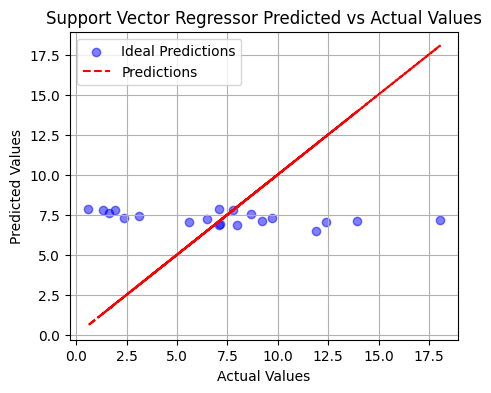

In [88]:
visualize_model = "Support Vector Regressor"
rf_y = predictions[visualize_model]['y']
rf_y_pred = predictions[visualize_model]['y_pred']

plt.figure(figsize=(5,4))
plt.scatter(rf_y, rf_y_pred, color='blue', alpha=0.5)
plt.plot(rf_y, rf_y, color='red', linestyle='--')  # Plot diagonal line for reference (y = x)

# Customize plot labels and title
plt.title(f'{visualize_model} Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend(['Ideal Predictions', 'Predictions'], loc='best')

# Show plot
plt.show()


The performance is pretty bad!

## Trying PCA before modeling

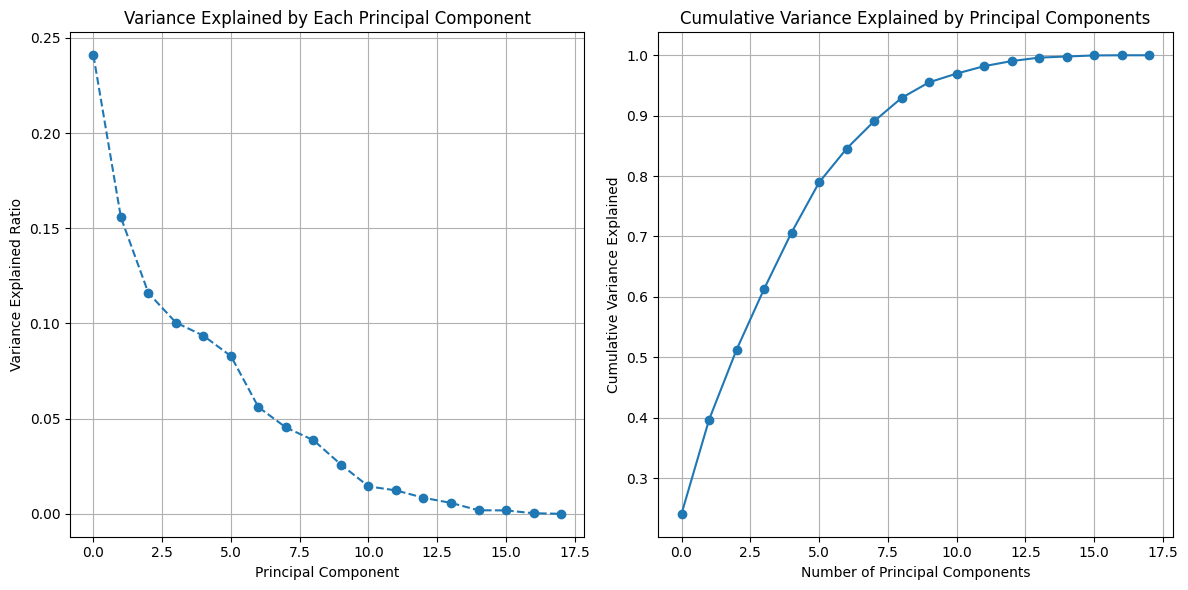

In [89]:
pca = PCA()

pca.fit(X)

# Plot variance explained by each principal component
plt.figure(figsize=(12, 6))

# Plot explained variance ratio of each principal component
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.grid(True)

# Plot cumulative variance explained
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)

plt.tight_layout()
plt.show()

Looks like elbows form at PCs 4 and 6, trying out both

In [90]:
principal_components = pca.transform(X)

n_components = 4
first_4_pcs = principal_components[:, :n_components]
print("Shape of first 4 principal components:", first_4_pcs.shape)

n_components = 6
first_6_pcs = principal_components[:, :n_components]
print("Shape of first 4 principal components:", first_6_pcs.shape)

Shape of first 4 principal components: (20, 4)
Shape of first 4 principal components: (20, 6)


Linear Regression - RMSE: 5.8884, R2: -70.6172%
Ridge Regression - RMSE: 5.8139, R2: -66.3298%
Lasso Regression - RMSE: 5.1763, R2: -31.8465%
Decision Tree Regression - RMSE: 6.4847, R2: -106.9246%
Random Forest Regression - RMSE: 5.4877, R2: -48.1905%
Gradient Boosting Regression - RMSE: 6.3601, R2: -99.0518%
Support Vector Regressor - RMSE: 4.8118, R2: -13.9331%


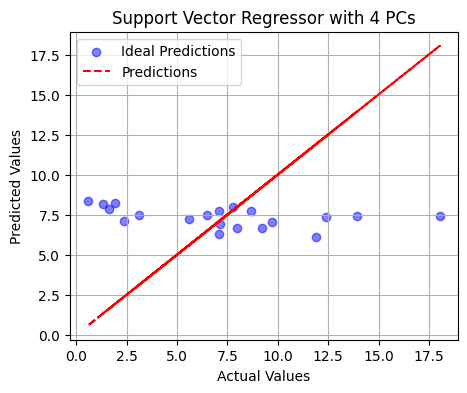

In [91]:
predictions = all_models_test(models, first_4_pcs, y)

visualize_model = "Support Vector Regressor"
rf_y = predictions[visualize_model]['y']
rf_y_pred = predictions[visualize_model]['y_pred']

plt.figure(figsize=(5,4))
plt.scatter(rf_y, rf_y_pred, color='blue', alpha=0.5)
plt.plot(rf_y, rf_y, color='red', linestyle='--')  # Plot diagonal line for reference (y = x)

# Customize plot labels and title
plt.title(f'{visualize_model} with 4 PCs')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend(['Ideal Predictions', 'Predictions'], loc='best')

# Show plot
plt.show()


Linear Regression - RMSE: 7.1273, R2: -149.9654%
Ridge Regression - RMSE: 6.8348, R2: -129.8701%
Lasso Regression - RMSE: 5.3024, R2: -38.3475%
Decision Tree Regression - RMSE: 6.5508, R2: -111.1675%
Random Forest Regression - RMSE: 5.1304, R2: -29.5176%
Gradient Boosting Regression - RMSE: 5.8358, R2: -67.5842%
Support Vector Regressor - RMSE: 4.7642, R2: -11.6898%


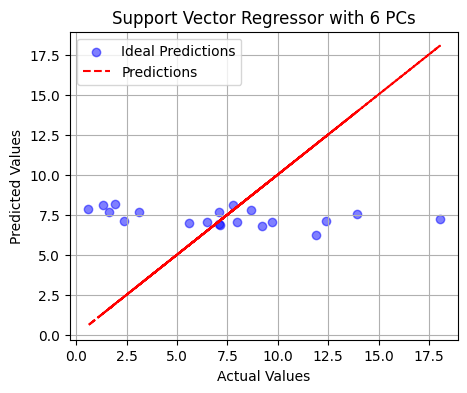

In [92]:
predictions = all_models_test(models, first_6_pcs, y)

visualize_model = "Support Vector Regressor"
rf_y = predictions[visualize_model]['y']
rf_y_pred = predictions[visualize_model]['y_pred']

plt.figure(figsize=(5,4))
plt.scatter(rf_y, rf_y_pred, color='blue', alpha=0.5)
plt.plot(rf_y, rf_y, color='red', linestyle='--')  # Plot diagonal line for reference (y = x)

# Customize plot labels and title
plt.title(f'{visualize_model} with 6 PCs')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend(['Ideal Predictions', 'Predictions'], loc='best')

# Show plot
plt.show()


In [93]:
storage_dir = configs["STORAGE_DIR_STUDY1"]
np.save(storage_dir + 'pathological_pcs.npy', principal_components)

In [94]:
principal_components.shape

(20, 18)

In [95]:
# df.corr() #only use with numerical

In [96]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # Histogram plots of the training data

# fig,ax =plt.subplots(3,3,figsize=(30,10))
# ax = ax.flatten()

# for i,training_col in enumerate(X.columns):
#     min =  X[training_col].quantile(0.01)
#     max =  X[training_col].quantile(0.99)
#     temp_series = X[training_col][X[training_col] < max].copy()
#     temp_series = temp_series[temp_series > min].copy()
#     sns.histplot(temp_series,ax=ax[i],color=colors[7])
#     ax[i].set_ylabel('Count', fontsize = 15) # Y label
#     ax[i].set_xlabel(training_col, fontsize = 15)

In [97]:
# # Distribution of the target variable
# sns.displot(y,color=colors[7])
# plt.axvline(x=y.mean(), color=colors[7], linestyle='--', linewidth=2,label='Mean House Value')
# plt.xlabel('Median House Value (in Million)')
# plt.legend()
# plt.title('California Housing Prices')

In [98]:
# # Correlation between different training features
# plt.figure(figsize=(30,9))
# sns.heatmap(X.corr(),annot=True)
# # Here we can see that avg Bedrooms and Avg rooms are highly correlation (0.85) which inituiively makes sense, as all bedrooms are rooms. On the other hand even the lattitude and longtitude seem to be highly negatively correlated .This would imply that correlation is not causation.


In [99]:
# # checking for outliers in the data using boxplot
# X.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
# plt.show()